In [470]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm

# Market Data for US

In [226]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [227]:
df_CRSP_market_daily

,vwretd,veretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
Date,,,,,,,,,,
2000-01-03,-0.006803,-0.006810,0.002878,0.002860,16897673600,8358,17013544200,8357,1455.22,-0.009549
2000-01-04,-0.039652,-0.039679,-0.017465,-0.017486,16228867700,8359,16897669000,8357,1399.42,-0.038345
2000-01-05,-0.000935,-0.001009,0.007821,0.007743,16212787400,8360,16228817900,8356,1402.11,0.001922
2000-01-06,-0.007391,-0.007547,0.004504,0.004453,16089055800,8358,16199203000,8358,1403.45,0.000956
2000-01-07,0.032516,0.032514,0.017008,0.016991,16610768100,8353,16087694900,8353,1441.47,0.027090
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.002332,0.002197,-0.000277,-0.000458,49387699400,7515,49278049200,7515,3703.06,0.003537
2020-12-28,0.003870,0.003859,0.001350,0.001304,49579392700,7516,49387699400,7514,3735.36,0.008723
2020-12-29,-0.003649,-0.003657,-0.008483,-0.008656,49396998600,7522,49576731700,7514,3727.04,-0.002227


In [228]:
df_CRSP_riskfree_monthly=pd.read_csv('../data/CRSP/CRSP Risk Free Rates.csv',\
index_col=4,parse_dates=True)

In [46]:
df_CRSP_riskfree_monthly

,KYTREASNOX,TIDXFAM,TTERMTYPE,TTERMLBL,RMTREASNO,RMCRSPID,TMBIDYTM,TMASKYTM,TMYTM,TMDURATN
MCALDT,,,,,,,,,,
2000-01-31,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203118,20000302.4,5.3900,5.3800,5.3900,31
2000-02-29,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203122,20000330.4,5.3200,5.3100,5.3100,30
2000-03-31,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203133,20000504.4,5.8600,5.8500,5.8600,34
2000-04-28,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203141,20000601.4,5.2800,5.2600,5.2700,34
2000-05-31,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203149,20000706.4,4.6800,4.6700,4.6700,36
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,2000002,RISKFREE,90,CRSP Risk Free Rates - 3-Month (Nominal),207541,20201127.4,0.1060,0.0963,0.1010,88
2020-09-30,2000002,RISKFREE,90,CRSP Risk Free Rates - 3-Month (Nominal),207571,20201229.4,0.0913,0.0811,0.0862,90
2020-10-30,2000002,RISKFREE,90,CRSP Risk Free Rates - 3-Month (Nominal),207468,20210128.4,0.0913,0.0862,0.0887,90


In [52]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)

In [58]:
df_AQR_risk_free_daily

,Risk Free Rate
DATE,
1926-07-31,0.000106
1926-08-02,0.000120
1926-08-03,0.000120
1926-08-04,0.000120
1926-08-05,0.000120
...,...
2020-12-25,0.000003
2020-12-28,0.000003
2020-12-29,0.000003


# Single Stock Data

In [536]:
df_one_day_one_stock=pd.read_csv('../data/US Stocks Data/kibot/AAME.txt',header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)

In [537]:
df_one_day_one_stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-24,2.1377,2.1377,2.078,2.078,383
2020-12-28,2.1200,2.1400,2.100,2.100,2724
2020-12-29,2.0746,2.1000,2.050,2.100,985
2020-12-30,2.1150,2.1500,2.100,2.100,6259
2020-12-31,2.1000,2.1400,2.050,2.060,6613


In [538]:
df_one_day_one_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2005-01-03 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3652 non-null   float64
 1   High    3652 non-null   float64
 2   Low     3652 non-null   float64
 3   Close   3652 non-null   float64
 4   Volume  3652 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.2 KB


In [539]:
df_return=(np.log(df_one_day_one_stock)-np.log(df_one_day_one_stock).shift(1))[1:][['Close']]
df_return.columns=['total_ret']

## Merge all required data

In [540]:
dfs=[df_return,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']]]

In [541]:
df_one_stock_return_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)

In [542]:
df_one_stock_return_merged.head()

,total_ret,Risk Free Rate,vwretd
2005-01-04,0.025750,0.000087,-0.012805
2005-01-05,-0.016033,0.000087,-0.006124
2005-01-06,-0.026135,0.000087,0.003483
2005-01-07,0.061021,0.000087,-0.002217
2005-01-10,0.018504,0.000087,0.004212


In [543]:
df_one_stock_return_merged.total_ret =df_one_stock_return_merged.total_ret-\
df_one_stock_return_merged['Risk Free Rate']
df_one_stock_return_merged.vwretd =df_one_stock_return_merged.vwretd-\
df_one_stock_return_merged['Risk Free Rate'] 

In [544]:
df_one_stock_return_merged=df_one_stock_return_merged.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt',
                                                                     'total_ret':'ret'})

In [545]:
df_one_stock_return_merged.tail()

,ret,rf,mkt
2020-12-24,-0.010535,0.000003,0.002329
2020-12-28,0.010528,0.000003,0.003867
2020-12-29,-0.000003,0.000003,-0.003652
2020-12-30,-0.000003,0.000003,0.003278
2020-12-31,-0.019235,0.000003,0.003553


## Beta Calculation

### ex ante beta

In [546]:
# Estimate rolling 5 year(1260 trading days) correlations with 
# minimum 750 non-missing datapoints
df_one_stock_return_merged['corr'] = pd.DataFrame(df_one_stock_return_merged['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_one_stock_return_merged['mkt']))
df_one_stock_return_merged['corr'] = df_one_stock_return_merged['corr'].shift(1)

In [547]:
df_one_stock_return_merged

,ret,rf,mkt,corr
2005-01-04,0.025662,0.000087,-0.012892,NaN
2005-01-05,-0.016120,0.000087,-0.006211,NaN
2005-01-06,-0.026223,0.000087,0.003396,NaN
2005-01-07,0.060934,0.000087,-0.002304,NaN
2005-01-10,0.018416,0.000087,0.004125,NaN
...,...,...,...,...
2020-12-24,-0.010535,0.000003,0.002329,0.091535
2020-12-28,0.010528,0.000003,0.003867,0.091469
2020-12-29,-0.000003,0.000003,-0.003652,0.091566
2020-12-30,-0.000003,0.000003,0.003278,0.091531


In [548]:
df_log_return_three_days=np.log(df_one_stock_return_merged[['ret','mkt']]+1).rolling(window=3).sum()

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [549]:
df_log_return_three_days['corr'] = pd.DataFrame(df_log_return_three_days['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_log_return_three_days['mkt']))
df_log_return_three_days['corr'] = df_log_return_three_days['corr'].shift(1)

<AxesSubplot:>

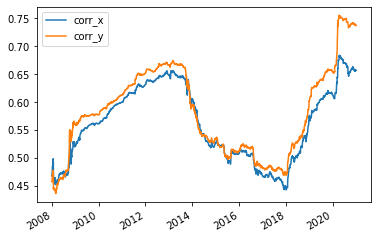

In [357]:
pd.merge(df_log_return_three_days['corr'],df_one_stock_return_merged['corr'],left_index=True,
        right_index=True).dropna().plot()

In [358]:
# use three-day log returns to control for nonsynchronous trading
df_one_stock_return_merged['corr']=df_log_return_three_days['corr']

In [359]:
df_one_stock_return_merged

,ret,rf,mkt,corr
2005-01-04,0.010801,0.000087,-0.012892,NaN
2005-01-05,0.007952,0.000087,-0.006211,NaN
2005-01-06,0.001229,0.000087,0.003396,NaN
2005-01-07,0.069688,0.000087,-0.002304,NaN
2005-01-10,-0.004534,0.000087,0.004125,NaN
...,...,...,...,...
2020-12-24,0.007843,0.000003,0.002329,0.656561
2020-12-28,0.035331,0.000003,0.003867,0.656356
2020-12-29,-0.013275,0.000003,-0.003652,0.656524
2020-12-30,-0.009025,0.000003,0.003278,0.656515


In [360]:
# same for rolling std, but with 1 year horizon (252 trading days) with 
# minimum 120 non-missing datapoints
df_one_stock_return_merged['i_std'] = pd.DataFrame(df_one_stock_return_merged['ret'].\
                                                      rolling(252, min_periods=120).std())
df_one_stock_return_merged['i_std'] = df_one_stock_return_merged['i_std'].shift(1)

df_one_stock_return_merged['mkt_std'] = pd.DataFrame(df_one_stock_return_merged['mkt'].\
                                                      rolling(252, min_periods=120).std())
df_one_stock_return_merged['mkt_std'] = df_one_stock_return_merged['mkt_std'].shift(1)

In [361]:
df_one_stock_return_merged

,ret,rf,mkt,corr,i_std,mkt_std
2005-01-04,0.010801,0.000087,-0.012892,NaN,NaN,NaN
2005-01-05,0.007952,0.000087,-0.006211,NaN,NaN,NaN
2005-01-06,0.001229,0.000087,0.003396,NaN,NaN,NaN
2005-01-07,0.069688,0.000087,-0.002304,NaN,NaN,NaN
2005-01-10,-0.004534,0.000087,0.004125,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,0.007843,0.000003,0.002329,0.656561,0.029468,0.021216
2020-12-28,0.035331,0.000003,0.003867,0.656356,0.029450,0.021215
2020-12-29,-0.013275,0.000003,-0.003652,0.656524,0.029522,0.021216
2020-12-30,-0.009025,0.000003,0.003278,0.656515,0.029538,0.021214


In [364]:

#drop all the rows where in ANY column there is a NAN value
df_one_stock_return_merged = df_one_stock_return_merged.dropna(how='any')
# Estimation betas like on page 8 in eq (14) in the paper
df_one_stock_return_merged['beta_est'] = df_one_stock_return_merged['corr']*df_one_stock_return_merged['i_std'].div(df['mkt_std'])
#Shrink the betas to make them less noisy eq(15)
df_one_stock_return_merged['beta_est'] = 0.6*df_one_stock_return_merged['beta_est'] + 0.4

<AxesSubplot:>

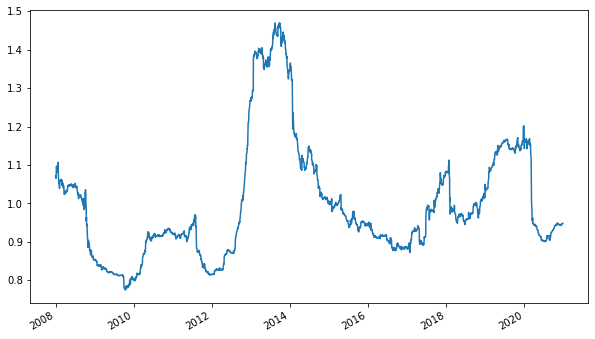

In [363]:
df_one_stock_return_merged.beta_est.plot(figsize=(10,6))

# All stocks

## First trial, not available for large dataset with daily data

In [443]:
df_all=pd.DataFrame(columns=['Ticker','Close'])

In [444]:
for filename in os.listdir(data_folder_path)[:500]:
    if 'txt' in filename:
        df_one_day_one_stock=pd.read_csv(data_folder_path+filename,header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)
        df_return=(np.log(df_one_day_one_stock)-np.log(df_one_day_one_stock).shift(1))[1:][['Close']]
        df_return['Ticker'] = ''.join(filename.split('.')[:-1])
        
        df_all=df_all.append(df_return)

In [445]:
df_all = df_all.rename(columns={'Close':'total_ret'})

In [446]:
df_all

,Ticker,total_ret
2020-12-22,CONXW,0.117319
2020-12-23,CONXW,0.061930
2020-12-24,CONXW,-0.068993
2020-12-28,CONXW,-0.011050
2020-12-29,CONXW,-0.011173
...,...,...
2020-12-24,BSBK,-0.011924
2020-12-28,BSBK,-0.006565
2020-12-29,BSBK,-0.012148
2020-12-30,BSBK,0.006645


In [447]:
dfs=[df_all,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']]]

In [448]:
df_all_stock_return_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)

In [450]:
df_all_stock_return_merged.total_ret =df_all_stock_return_merged.total_ret-\
df_all_stock_return_merged['Risk Free Rate']
df_all_stock_return_merged.vwretd =df_all_stock_return_merged.vwretd-\
df_all_stock_return_merged['Risk Free Rate'] 

In [451]:
df_all_stock_return_merged=df_all_stock_return_merged.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt',
                                                                     'total_ret':'ret'})

In [452]:
df_all_stock_return_merged

,Ticker,ret,rf,mkt
2005-01-04,GTSI,-0.053725,0.000087,-0.012892
2005-01-04,AROW,-0.012510,0.000087,-0.012892
2005-01-04,EPIQ,-0.017776,0.000087,-0.012892
2005-01-04,ARMH,0.004776,0.000087,-0.012892
2005-01-04,KMB,0.000749,0.000087,-0.012892
...,...,...,...,...
2020-12-31,KF,0.002975,0.000003,0.003553
2020-12-31,OAS,0.007804,0.000003,0.003553
2020-12-31,AFGE,-0.001455,0.000003,0.003553
2020-12-31,POWL,0.006624,0.000003,0.003553


In [453]:

# define function to estimate rolling 5 year(60 month) correlations with minimum 36 non-missing datapoints
def roll_corr(x):
    return pd.DataFrame(x['ret'].rolling(60, min_periods=36).corr(x['mkt']))


#same for rolling std, but with 1 year horizon
def roll_var(x):
    return pd.DataFrame(x['ret'].rolling(252, min_periods=120).std())

Daily data is too much, need to change a method for alpha calculation

## Second Trial

### Focus on One Day

In [553]:
filenames=os.listdir(data_folder_path)
filenames.sort()

In [519]:
def get_ex_ante_beta(filename,df_risk_free,df_market):
    df_one_day_one_stock=pd.read_csv(data_folder_path+filename,header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)
    df_return=(np.log(df_one_day_one_stock)-np.log(df_one_day_one_stock).shift(1))[1:][['Close']]
    df_return.columns=['total_ret']
    dfs=[df_return,df_risk_free,df_market]
    df=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)
    df.total_ret =df.total_ret-df['Risk Free Rate']
    df.vwretd =df.vwretd-df['Risk Free Rate'] 
    df=df.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt','total_ret':'ret'})
    df_log_return_three_days=np.log(df[['ret','mkt']]+1).rolling(window=3).sum()
    df_log_return_three_days['corr'] = pd.DataFrame(df_log_return_three_days['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_log_return_three_days['mkt']))
    df_log_return_three_days['corr'] = df_log_return_three_days['corr'].shift(1)
    df['corr']=df_log_return_three_days['corr']
    df['i_std'] = pd.DataFrame(df['ret'].rolling(252, min_periods=120).std())
    df['i_std'] = df['i_std'].shift(1)
    df['mkt_std'] = pd.DataFrame(df['mkt'].rolling(252, min_periods=120).std())
    df['mkt_std'] = df['mkt_std'].shift(1)
    df = df.dropna(how='any')
    df['beta_est'] = df['corr']*df['i_std'].div(df['mkt_std'])
    df['beta_est'] = 0.6*df['beta_est'] + 0.4
    return df[['ret','beta_est']]

In [535]:
get_ex_ante_beta('AACG.txt',df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']])

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


,ret,beta_est
2011-03-01,-0.000006,0.695041
2011-03-02,-0.021485,0.686534
2011-03-03,0.006359,0.685319
2011-03-04,-0.034871,0.684159
2011-03-07,0.010452,0.688422
...,...,...
2020-12-24,-0.000003,0.585419
2020-12-28,-0.064542,0.585421
2020-12-29,-0.008371,0.585789
2020-12-30,0.008365,0.585517


In [554]:
for filename in filenames[6000:]:
    print(filename[:-4])
    df_=get_ex_ante_beta(filename,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']])
    if not len(df_)==0:
        df_.to_pickle('../data/Ex Ante Beta/'+filename[:-4]+'.pickle')

ITUB
ITUS
ITW
ITWO
IUSA
IVA
IVAC
IVAN
IVC
IVD
IVGN
IVH
IVN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


IVR.A
IVR.B
IVR.C
IVR
IVTY
IVZ
IWA
IWOV
IX
IXYS
IZEA
J
JACK
JACQ
JADE
JAG
JAGX
JAH
JAKK
JAMF
JAN
JAQC
JAS
JASN
JASNW
JASO
JAV
JAVA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JAX
JAXB
JAZZ
JBGS
JBHT
JBI
JBJ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JBK
JBL
JBLU
JBN
JBO
JBR
JBSS
JBT
JBX
JCAP.B
JCAP
JCDA
JCE
JCG
JCI
JCO
JCOM
JCP
JCS
JCTCF


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JD
JDAS
JDD
JDSU
JE.A
JE
JEC
JEF
JELD
JEMD
JEQ
JFBI
JFC
JFIN
JFK
JFKKR
JFKKU
JFKKW
JFP
JFR
JFU
JG
JGG
JGH
JGT
JGV
JGW
JHA
JHAA
JHB
JHD
JHG
JHI
JHP
JHS
JHX
JHY
JIH.U
JIH
JILL
JIVE
JJSF
JKHY
JKS
JLA
JLL
JLS
JMBA
JMEI
JMF
JMG
JMI
JMIA
JMLP
JMM
JMP
JMPB
JMPC
JMPD
JMPE
JMPNL
JMPNZ
JMT
JMU
JNCE
JNGW
JNJ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JNP
JNPR
JNS
JNY
JOB
JOBS
JOE
JOET
JOEZ
JOF
JOSB
JOUT
JOY
JOYG
JP
JPC
JPEP
JPG
JPI
JPM.A
JPM.B
JPM.C
JPM.D
JPM.E
JPM.F
JPM.G
JPM.H
JPM.J
JPM
JPS
JPT
JPW
JPZ
JQC
JRCC
JRI
JRJC
JRJR
JRN
JRO
JRS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JRSH
JRT
JRVR
JSD
JSM
JSN
JST


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JSYN
JSYNR
JSYNU
JSYNW
JT
JTA
JTD
JTP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


JTPY
JTX
JUNO
JUPW
JUPWW
JVA
JW.A
JW.B
JWF
JWN
JWS.U
JWS
JXSB
JYAC
JYNT
JZC
JZH
JZJ
JZK
JZL
JZS
JZT
JZV
K
KAAC
KAACU
KAACW
KAI
KALA
KALU
KALV
KAMN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KANG
KAP
KAR
KATE
KAZ
KB
KBAL
KBALB
KBH
KBIO
KBLM
KBLMR
KBLMU
KBLMW
KBNT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KBNTW
KBR
KBSF
KBW
KBWP
KBWX
KBWY
KBX
KC
KCAC.U
KCAC
KCAP
KCAPL
KCC
KCG
KCI
KCP
KCW
KDMN
KDN
KDNY
KDP
KE
KED
KEF
KEG
KELYA
KELYB
KEM
KEN
KEP
KEQU
KERN
KERNW
KERX
KEX
KEY.G


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KEY.H
KEY.I
KEY.J
KEY.K
KEY
KEYN
KEYS
KEYW
KF
KFED
KFFB
KFFG
KFH
KFI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KFN
KFRC
KFS
KFT
KFX
KFY
KG
KGC
KGJI
KGN
KH
KHC
KHI
KID


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KIDS
KIM.H
KIM.I
KIM.J
KIM.K
KIM.L
KIM.M
KIM
KIN
KING
KINS
KINZU
KIO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KIOR
KIPO
KIPS
KIQ
KIRK
KITD
KITE
KKD
KKR.A
KKR.B
KKR.C
KKR
KL
KLAC
KLDO
KLDX
KLIC
KLR
KLRE
KLREU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KLREW
KLXE
KLXEV
KLXI
KLXIV
KMB
KMDA
KMF
KMG
KMGB
KMI.A
KMI
KMM
KMP
KMPA
KMPH
KMPR
KMR
KMT
KMX
KN
KND
KNDI
KNDL
KNL
KNM
KNO
KNOL
KNOP
KNOT
KNR
KNSA
KNSL
KNSY
KNTE
KNX
KNXA
KO
KOD
KODK
KOF
KOG
KONA
KONE
KONG
KOOL
KOP
KOPN
KOR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KORS
KOS
KOSN
KOSS
KPFS
KPPC
KPTI
KR
KRA
KRAT
KRBP
KRC.G


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KRC.H
KRC
KREF
KRFT
KRG.A
KRG
KRJ
KRKR
KRMD
KRNT
KRNY
KRO
KRON
KROS
KRP
KRTX
KRUS
KRYS
KS
KSE
KSK
KSM
KSMT
KSMTU
KSMTW
KSPN
KSS
KST
KSU
KSW
KSWS
KT
KTB
KTCC
KTEC
KTF
KTH
KTII
KTN
KTOS
KTOV
KTOVW
KTP
KTRA
KTWO
KUB
KUN
KURA
KUTV
KV.A
KVHI
KW
KWAC.U
KWK
KWKA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KWKAQ
KWN
KWR
KXIN
KXINW
KXM
KYE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


KYMR
KYN.E
KYN.F
KYN.G
KYN
KYO
KYTH
KZ
KZIA
KZR
L
LAB
LABC
LABL
LAC
LACO
LACQ
LACQU
LACQW
LAD
LADR
LAIX
LAKE
LAMR
LANC
LAND
LANDO
LANDP
LAQ
LARK
LAS
LASR
LATN
LATNU
LATNW
LAUR
LAVA
LAWS
LAYN
LAZ
LAZR
LAZRW
LAZY
LB
LBAI
LBC
LBF
LBIO
LBIX
LBMH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LBRDA
LBRDK
LBRDP
LBRT
LBTA
LBTYA
LBTYB
LBTYK
LBY
LC
LCA
LCAHU
LCAHW
LCAP
LCAPA
LCAPU
LCAPW
LCAV
LCC
LCI
LCII
LCM
LCNB
LCRY
LCTX
LCUT
LCY
LCYAU
LCYAW
LDEM
LDF
LDG
LDK
LDL
LDOS
LDP
LDR
LDRH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LDSH
LDX
LE
LEA
LEAF
LEAP.U
LEAP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LECO
LEDR
LEDS
LEE
LEG
LEGC
LEGH
LEGN
LEH
LEHMQ
LEI
LEJU
LEN.B


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LEN
LENS
LEO
LESL
LEU
LEVB
LEVI
LEVL
LEVLP
LEXEA
LEXEB
LF
LFAC
LFACU
LFACW
LFC
LFG
LFGR
LFL
LFT
LFTR
LFTRU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LFTRW
LFUS
LFVN
LG
LGC.U
LGC
LGCY
LGCYO
LGCYP
LGF.A
LGF.B
LGF
LGHL
LGHLW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LGI
LGIH
LGL
LGN
LGND
LGP
LGTY
LGVW.U
LGVW
LH
LHC.U
LHC
LHCG
LHO.H
LHO.I
LHO.J
LHO
LHX
LI
LIFE
LII
LILA
LILAK
LILAR
LILAV
LILKV
LIN
LINC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LIND
LINDW
LINE
LINTA
LINTB
LINU
LINX
LION
LIOX
LIQD
LIQT
LITB
LITE
LIVE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LIVK
LIVKU
LIVKW
LIVN
LIVX
LIXT
LIXTW
LIZ
LIZI
LJPC
LK
LKCO
LKFN
LKM
LKQ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LKQX
LKSD
LL
LLEX
LLIT
LLL
LLNW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LLTC
LLY
LM
LMAT
LMB
LMCA
LMCB
LMCK
LMDIA
LMFA
LMFAU
LMFAW
LMHA
LMHB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LMIA
LMND
LMNL
LMNR
LMNS
LMNX
LMOS
LMPX
LMRK
LMRKN
LMRKO
LMRKP
LMST
LMT
LMZ
LN
LNBB
LNC
LNCE
LNCO
LNCR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LND
LNDC
LNET
LNFA.U
LNG
LNKD
LNN
LNSR
LNT
LNTH
LNY
LO
LOAC
LOACR
LOACU
LOACW
LOAK.U
LOAK
LOAN
LOB
LOCK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LOCM
LOCO
LODE
LOGC
LOGI
LOGM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LOJN
LOKB.U
LOMA
LON
LONE
LONG
LOOK
LOOP
LOPE
LOR
LORL
LOV
LOVE
LOW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LOXO
LPAL
LPCN
LPDX
LPG
LPH
LPHI
LPI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LPL
LPLA
LPLT
LPNT
LPR
LPRO
LPS
LPSB
LPSN
LPT
LPTH
LPTN
LPTX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LPX
LQ
LQDA
LQDT
LRAD
LRCX
LRE
LRMR
LRN
LRY
LSAC
LSACU
LSACW
LSAQ
LSBG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LSBI
LSBK
LSCC
LSE
LSF
LSG
LSI
LSPD
LSR
LSTR
LSTZA
LSXMA
LSXMB
LSXMK
LSXMR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LTBR
LTC
LTD
LTEA
LTHM
LTM
LTN.U


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LTN
LTON
LTRN
LTRPA
LTRPB
LTRX
LTS.A
LTS
LTSF
LTSH
LTSK
LTSL
LTXB
LTXC
LTXX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LU
LUB
LUFK
LUK
LULU
LUMN
LUMO
LUNA
LUNG
LUV
LUX
LUXA
LUXAU
LUXAW
LVB
LVGO
LVLT
LVNTA
LVNTB
LVOL
LVS
LW
LWAY
LWSN
LX
LXEH
LXFR
LXFT
LXK
LXP.C
LXP
LXRX
LXU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


LYB
LYFT
LYG.A
LYG
LYL
LYRA
LYTS
LYV
LZ
LZB
LZEN
M
MA
MAA.I
MAA
MAAC
MAACU
MAACW
MAB
MAC
MACK
MACQ
MACQU
MACQW
MACU
MACUU
MACUW
MAG
MAGS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MAIN
MAKO
MALL
MAMS
MAN
MANH
MANT
MANU
MAPP
MAR
MARA
MARK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MARPS
MAS
MASB
MASC
MASI
MASS
MAT
MATK
MATR
MATW
MATX
MAV
MAX
MAXN
MAXR
MAXY
MAY
MAYS
MB
MBA
MBB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MBC
MBCN
MBF
MBFI
MBFIO
MBFIP
MBHI
MBI
MBII
MBIN
MBINO
MBINP
MBIO
MBIS
MBL
MBLX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MBLY
MBNAA
MBNAB
MBND
MBNKP
MBOT
MBRG
MBRK
MBRX
MBT
MBTF
MBUU
MBVT
MBVX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MBWM
MC
MCA
MCAC
MCACR
MCACU
MCB
MCBC
MCBF
MCBS
MCC
MCCC
MCD
MCEP
MCF
MCFE
MCFT
MCGC
MCHI
MCHP
MCHX
MCI
MCK
MCMJ
MCMJU
MCMJW
MCN
MCO
MCOX
MCP
MCQ
MCR
MCRB
MCRI
MCRL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MCRN
MCRS
MCS
MCUR
MCV
MCX
MCY
MCZ
MD
MDA
MDAS
MDB
MDC
MDCA
MDCI
MDCO
MDF
MDGL
MDGN
MDGS
MDGSW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MDH
MDIA
MDIAV
MDJH
MDLA
MDLQ
MDLX
MDLY
MDLZ
MDM
MDMD
MDNA
MDP
MDR
MDRR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MDRRP
MDRX
MDS
MDSO
MDSY
MDT
MDTH
MDTL
MDU
MDVL
MDVN
MDVXW
MDW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MDWD
MDWT
MDXG
ME
MEA
MEAD
MEAS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MEC
MED
MEDP
MEDQ
MEDS
MEDW
MEDX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MEE
MEET
MEG
MEI
MEILW
MEILZ
MEIP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MELA
MELI
MELR
MEMP
MEMS
MEN
MEND
MENT
MEOH
MEP
MER.D
MER.E
MER.F
MER.K
MER.M
MER.P
MER
MERC
MERU
MESA
MESG
MESO
MET.A
MET.B
MET.E
MET.F
MET
METC
METR
METX
METXW
MEXS
MF
MFA.B
MFA.C


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MFA
MFAC.U
MFAC
MFB
MFC
MFCB
MFD
MFE
MFG
MFGLQ
MFGP
MFH
MFI
MFIN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MFINL
MFL
MFLR
MFLX
MFM
MFN
MFNC
MFO
MFRI
MFRM
MFS
MFSA
MFSF
MFT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MFV
MFW
MG
MGA
MGAM
MGCD
MGEE
MGEN
MGF
MGH
MGI
MGIC
MGJ
MGLN
MGM
MGN
MGNI
MGNX
MGP
MGPI
MGR
MGRB
MGRC
MGT
MGTA
MGTX
MGU
MGY
MGYR
MH.A
MH.C
MH.D
MHC
MHD
MHE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MHF
MHFI
MHG
MHGC
MHH
MHI
MHK
MHLA
MHLD
MHLDO
MHM
MHN
MHNA
MHNB
MHNC
MHO.A
MHO
MHP
MHR.C
MHR.D
MHR.E
MHR
MHS
MHW
MHY
MI
MIC
MICC
MICR
MICT
MICTW
MIDD
MIE
MIFI
MIG
MIGP
MIII
MIIIU
MIIIW
MIK
MIL
MILL.C
MILL.D
MILL
MIM
MIME
MIN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MIND
MINDP
MINI
MIPI
MIPS
MIR
MIRM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MIRN
MIST
MITI
MITK
MITL
MITO
MITT.A


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MITT.B
MITT.C
MITT
MIW
MIXT
MIY
MJC
MJCO
MJH
MJI
MJN
MKC.V
MKC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MKD
MKF
MKGI
MKL
MKN
MKS
MKSI
MKTG
MKTO
MKTX
MKV
MKZ
MLA
MLAB
MLAC
MLACU
MLACW
MLCO
MLG
MLHR
MLI
MLM
MLND
MLNK
MLNT
MLNX
MLP
MLR
MLSS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MLU
MLVF
MM
MMAC
MMC
MMD
MMDM
MMDMR
MMDMU
MMDMW
MMF
MMI
MMLP
MMM
MMP
MMPI
MMR
MMS
MMSI
MMT
MMU
MMUS
MMV
MMX
MMYT
MN
MNCL
MNCLU
MNCLW
MNDL
MNDO
MNE
MNEL
MNGA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MNGLU
MNI
MNK
MNKD
MNLO
MNOV
MNP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MNPR
MNR.A
MNR.B
MNR.C
MNR
MNRK
MNRKP
MNRL
MNRO
MNRTA
MNSB
MNSBP
MNSO
MNST
MNT
MNTA
MNTG
MNTX
MO
MOBI
MOBL
MOC
MOCO
MOD
MODL
MODN
MOFG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MOG.A
MOG.B
MOGO
MOGU
MOH
MOHO
MOKO
MOL
MOLG
MOLX
MOLXA
MOMO
MON
MONT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MOR
MORE
MORF
MORN
MOS
MOSC.U
MOSC
MOSY
MOT
MOTN
MOTNU
MOTNW
MOTR
MOTS
MOTV.U
MOU
MOV
MOVE
MOXC
MP.D
MP
MPA
MPAA
MPAC
MPACU
MPACW
MPB
MPC
MPE
MPEL
MPET
MPG
MPJ
MPLN
MPLX
MPO
MPR
MPS
MPSX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MPV
MPVD
MPW
MPWR
MPX
MQC
MQT
MQY
MR
MRACU
MRAM
MRBK
MRC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MRCC
MRCCL
MRCY
MRD
MRDN
MRDNW
MREO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MRF
MRH.A
MRH
MRIC
MRIN
MRK
MRKR
MRKT
MRLN
MRM
MRNA
MRNS
MRO
MRSN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MRT
MRTN
MRTX
MRUS
MRVC
MRVI
MRVL
MRX
MS.A
MS.E
MS.F
MS.G
MS.I
MS.K
MS.L
MS
MSA
MSB
MSBF
MSBI
MSC
MSCA
MSCC
MSCI
MSCS
MSD
MSDI
MSDIW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MSDXP
MSEX
MSF
MSFG
MSFT
MSG
MSGE
MSGN
MSGS
MSHL
MSI
MSJ
MSK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MSL
MSLI
MSM
MSN
MSO
MSON
MSP
MSPD
MSS
MSSR
MSTR
MSTX
MSVB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MSW
MSY
MSZ
MT
MTA
MTACU
MTB.C
MTB
MTBC
MTBCP
MTC
MTCH
MTCN
MTCR
MTD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MTDR
MTE
MTEC
MTECU
MTECW
MTEM
MTEX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MTFB
MTFBW
MTG
MTGE
MTGEP
MTH
MTL
MTLS
MTN
MTNB
MTOR
MTOX
MTP
MTR
MTRN
MTRX
MTS
MTSC
MTSI
MTSL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MTSN
MTT
MTU
MTW
MTX
MTXX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MTY
MTZ
MU
MUA
MUC
MUDS
MUDSU
MUDSW
MUE
MUFG
MUH
MUI
MUJ
MUK
MULE
MUR
MUS
MUSA
MUX
MV
MVBF
MVC
MVCB
MVCD
MVF
MVG
MVIS
MVISW
MVL
MVNR
MVO
MVSN
MVT
MW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MWA
MWE
MWG
MWIV
MWK
MWO
MWR
MWRX
MWV
MWW
MWY
MX
MXA
MXB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MXC
MXE
MXF
MXGL
MXH
MXIM
MXL
MXN
MXPT
MXT
MXWL
MY
MYC
MYCC
MYD
MYE
MYF
MYFW
MYGN
MYI
MYJ
MYL
MYM
MYN
MYND


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


MYNDW
MYO
MYOK
MYOS
MYOV
MYP
MYRG
MYSZ
MYT
MZA
MZF
MZOR
N


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NABI
NAC
NAD
NADL
NAFC
NAI
NAII
NAK
NAKD
NAL
NAME


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NAN
NANO
NAO
NAOV
NAP
NARA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NARI
NAT
NATH
NATI
NATL
NATR
NAV.D
NAV
NAVB
NAVG
NAVI
NAVR
NAZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NBA.U
NBA
NBAC
NBACR
NBACU
NBACW
NBB
NBBC
NBCB
NBD
NBEV
NBG.A
NBG
NBH
NBHC
NBIX
NBJ
NBL
NBLX
NBN
NBO
NBR.A
NBR
NBRV
NBS
NBSE
NBTB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NBTF
NBTX
NBW
NBY
NC
NCA
NCB
NCBC
NCBS
NCC
NCFT
NCI
NCIT
NCL
NCLH
NCMI
NCNA
NCNO
NCO
NCOC
NCOM
NCP
NCQ
NCR
NCS
NCSM
NCT.B
NCT.C
NCT.D
NCT
NCTY
NCU
NCV.A


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NCV
NCZ.A
NCZ
NDAQ
NDLS
NDMO
NDN
NDP
NDRA
NDRAU
NDRAW
NDRM
NDRO
NDSN
NDZ
NE
NEA
NEBCU
NEBS
NEBU
NEBUU
NEBUW
NED
NEE.C
NEE.G
NEE.H
NEE.I
NEE.J
NEE.K
NEE.N
NEE.O
NEE.P
NEE.Q
NEE.R
NEE
NEFF
NEI
NEM
NEN
NEO
NEOG
NEON
NEOP
NEOS
NEOT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NEP
NEPH
NEPT
NERV
NES
NESR
NESRW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NET
NETC
NETE
NETL
NETS
NEU
NEV


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NEW
NEWA
NEWL
NEWM
NEWN
NEWP
NEWR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NEWS
NEWT
NEWTI
NEWTL
NEWTZ
NEX
NEXA
NEXT
NFBK
NFC.U
NFC
NFE
NFEC
NFG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NFH
NFIN
NFINU
NFINW
NFJ
NFLX
NFM
NFP
NFS
NFSB
NFX
NFZ
NG
NGA.U


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NGA
NGAC
NGACU
NGACW
NGB
NGD
NGG
NGHC
NGHCN
NGHCO
NGHCP
NGHCZ
NGK
NGL.B
NGL.C
NGL
NGLS.A
NGLS
NGM
NGMS
NGO
NGPC
NGS
NGSX
NGT
NGVC
NGVT
NGX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NGZ
NH
NHA
NHC.A
NHC
NHF
NHI
NHIC
NHICU
NHICW
NHLD
NHLDW
NHP
NHS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NHTB
NHTC
NHWK
NI.B
NI
NICE
NICK
NID
NIE
NIF
NIHD
NIHDQ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NII
NILE
NIM
NINE
NIO
NIQ
NISN
NITE
NIU
NIV
NJ
NJR
NJV
NK
NKA
NKBP
NKE
NKG
NKL
NKLA
NKLAW
NKO
NKR
NKSH
NKTR
NKTX
NKX
NL
NLC
NLCI
NLNK
NLOK
NLP
NLS
NLSN
NLTX
NLY.A
NLY.C
NLY.D
NLY.E
NLY.F


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NLY.G
NLY.H
NLY.I
NLY
NM.G
NM.H
NM
NMA
NMAR
NMB
NMBL
NMCI
NMCO
NMD
NMFC
NMFCL
NMFX
NMI
NMIH
NMK.B
NMK.C
NML
NMM
NMMC
NMMCU
NMMCW
NMO
NMP
NMR
NMRD
NMRK
NMRKV
NMRX
NMS
NMT
NMTR
NMX
NMY


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NMZ
NNA
NNB
NNBR
NNC
NNDM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NNF
NNI
NNJ
NNN.D
NNN.E
NNN.F
NNN
NNO
NNOX
NNP
NNVC
NNY
NOA
NOACU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NOAH
NOC
NODK
NOG
NOIZ
NOK
NOM
NOMD
NOOF
NOR
NORD
NOV
NOVA
NOVB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NOVL
NOVN
NOVS
NOVSU
NOVSW
NOVT
NOW
NP
NPA
NPAUU
NPAWW
NPBC
NPBCO
NPC
NPD
NPF
NPG
NPI
NPK
NPM
NPN
NPO
NPP
NPSP
NPT
NPTN
NPV
NPX
NPY
NQ
NQC
NQI
NQJ
NQM
NQN
NQP
NQS
NQU
NR
NRB
NRBO
NRC
NRCG
NRCI
NRCIA
NRCIB
NRE
NREF.A
NREF
NRF.A


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NRF.B
NRF.C
NRF.D
NRF.E
NRF
NRG
NRGM
NRGX
NRGY
NRIM
NRIX
NRK
NRO
NRP
NRT
NRU
NRUC
NRX
NRZ.A
NRZ.B
NRZ.C
NRZ
NS.A
NS.B
NS.C
NS
NSA.A
NSA
NSAM
NSAT
NSC
NSCO
NSEC
NSH.U
NSH
NSIT
NSL
NSLP.A
NSLP
NSM
NSP
NSPH
NSPR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NSR
NSS
NSSC
NST
NSTC
NSTG
NSU
NSYS
NTAP
NTB
NTC
NTCO
NTCT
NTE
NTEC
NTES
NTEST.A
NTEST.B
NTEST.C
NTEST
NTG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NTGN
NTGR
NTI
NTIC
NTIP
NTK
NTL
NTLA
NTLS
NTN
NTNX
NTP
NTR
NTRA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NTRI
NTRP
NTRS
NTRSO
NTRSP
NTS
NTSC
NTSP
NTST
NTT
NTUS
NTWK
NTX
NTY
NTZ
NU
NUAN
NUANV
NUC
NUE
NUJ
NUM
NUN
NUO
NURO
NUROW
NUS
NUTR
NUV
NUVA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NUW
NUZE
NVAX
NVC
NVCN
NVCR
NVDA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NVDQ
NVE
NVEC
NVEE
NVET
NVFY
NVG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NVGN
NVGND
NVGS
NVIV
NVJ
NVLN
NVLS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NVMI
NVMM
NVN
NVO
NVR
NVRO
NVS
NVSL
NVST
NVT
NVTA
NVTL
NVTR
NVTRV
NVUS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NVX
NVY
NW.C
NWA
NWBI
NWBOW
NWE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NWFL
NWG
NWGI
NWHM
NWI
NWK
NWL
NWLI
NWLIA
NWN
NWPX
NWS
NWSA
NWSB
NWY
NX
NXC
NXE
NXEO
NXEOU
NXEOW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NXGN
NXI
NXJ
NXK
NXM
NXN
NXP
NXPI
NXQ
NXR
NXRT
NXST
NXTC
NXTD
NXTDW
NXTM
NXY
NXZ
NYB
NYC
NYCB.A
NYCB.U
NYCB
NYH
NYLD.A
NYLD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NYM
NYMT
NYMTM
NYMTN
NYMTO
NYMTP
NYMX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


NYNY
NYNYR
NYRT
NYT
NYV
NYX
NZ
NZF
NZH
NZR
NZT
NZW
NZX
O.F
O
OA
OABC
OAC.U
OAC
OACB.U
OACB
OACQ
OACQR
OACQU
OACQW
OAK.A
OAK.B
OAK
OAKS.A
OAKS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OAS
OASM
OB
OBAF
OBAS
OBCI
OBE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OBLG
OBLN
OBNK
OBSV
OBT
OC
OCA.U
OCAT
OCC
OCCI
OCCIP
OCFC
OCFCP
OCFT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OCG
OCGN
OCIP
OCIR
OCLR
OCLS
OCLSW
OCN
OCR.A
OCR.B
OCR
OCRX
OCSI
OCSL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OCSLL
OCUL
OCUP
OCX
OCZ
ODC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ODFL
ODP
ODSY
ODT
OEC
OEG
OEH
OESX
OFC.L
OFC
OFED
OFG.A
OFG.B
OFG.D
OFG
OFI
OFIX
OFLX
OFS
OFSSG
OFSSI
OFSSL
OFSSZ
OGE
OGEN
OGI
OGS
OGXI
OHAI
OHI
OHRP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OI
OIA
OIB
OIBR.C
OIBR
OIC
OII
OIIM
OILT
OINK
OIS
OKE
OKS
OKSB
OKSBP
OKTA
OLB
OLBK
OLED
OLLI
OLMA
OLN
OLP
OM
OMAA
OMAB
OMAD.U
OMAD
OMAM
OMC
OMCL
OME
OMED
OMER
OMEX
OMF
OMG
OMGI
OMI
OMN
OMP
OMPI
OMRI
OMTH
OMTR
OMX
ON
ONB
ONCE
ONCR
ONCS
ONCT
ONCY
ONDK
ONDS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ONE
ONEM
ONEW
ONFC
ONNN
ONP
ONS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ONSIU
ONSIW
ONSIZ
ONSM
ONTO
ONTX
ONTXW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ONTY
ONVI
ONVO
ONXX
OOK
OOMA
OPAY
OPB
OPBK
OPCH
OPEN
OPENW
OPES
OPESU
OPESW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OPGN
OPGNW
OPHC
OPHT
OPI
OPINI
OPINL
OPK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OPLK
OPNT
OPOF
OPP.A
OPP
OPRA
OPRT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OPRX
OPT
OPTM
OPTN
OPTR
OPTT
OPTV
OPWR
OPWV
OPXA
OPXAW
OPXT
OPY
OR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ORA
ORAN
ORB
ORBC
ORBK
ORC
ORCC
ORCL
ORCT
OREX
ORGO
ORGS
ORH
ORI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ORIC
ORIG
ORIT
ORLA
ORLY
ORM
ORMP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ORN
ORPH
ORPN
ORRF
ORSN
ORSNR
ORSNU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ORSNW
ORTX
OSB
OSBC
OSBCP
OSG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OSGB
OSGIQ
OSH
OSHC
OSIP
OSIR
OSIS
OSK
OSLE
OSM
OSMT
OSN
OSPN
OSPR
OSPRU
OSPRW
OSS
OSTK
OSUR
OSW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OTEL
OTEX
OTIC
OTIS
OTIV
OTLK
OTLKW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OTRA
OTRAU
OTRAW
OTRK
OTRKP
OTT
OTTR
OTTW
OUT
OUTD
OUTR
OVAS
OVBC
OVEN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OVID
OVLY
OVRL
OVTI
OVV


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OWW
OXBR
OXBRW
OXBT
OXF
OXFD
OXGN
OXLC
OXLCM
OXLCN
OXLCO
OXLCP
OXM
OXPS
OXSQ
OXSQL
OXSQZ
OXY
OYOG
OYST


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


OZK
OZM
OZON
OZRK
P
PAA
PAAC
PAACR
PAACU
PAACW
PAAS
PAC
PACB
PACD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PACE.U
PACE
PACEU
PACEW
PACK
PACQ
PACQU
PACQW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PACR
PACT
PACW
PAE
PAET
PAEWW
PAG
PAGP
PAGS
PAH
PAHC
PAI
PAIC
PAICU
PAICW
PAL
PALM
PAM
PANA.U
PANA
PAND
PANL
PANW
PAR
PARL
PARN
PARR
PAS
PASG

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()



PATH
PATI
PATK
PATR
PAVM
PAVMU
PAVMW
PAVMZ
PAY
PAYA
PAYAW
PAYC
PAYS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PAYX
PB
PBA
PBB
PBBI
PBC
PBCP
PBCT
PBCTP
PBF
PBFS
PBFX
PBG
PBH
PBHC
PBI.A
PBI.B
PBI
PBIB
PBIO
PBIP
PBKS
PBLA
PBM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PBMD
PBNC
PBNY
PBPB
PBR.A
PBR
PBSK
PBT
PBTH
PBTS
PBY
PBYI
PC
PCAP
PCAR
PCB
PCBK
PCC
PCCC
PCE
PCF
PCG.A
PCG.B
PCG.C
PCG.D
PCG.E
PCG.G
PCG.H
PCG.I
PCG
PCGU
PCH
PCI
PCK
PCL
PCLN
PCM
PCMI
PCN
PCO
PCOM
PCP
PCPC.U
PCPL.U
PCPL
PCQ
PCR
PCRX
PCS
PCSA
PCSB
PCTI
PCTY
PCU
PCVX
PCX
PCXCQ
PCYC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PCYG
PCYO
PD
PDAC.U
PDAC
PDC
PDCE
PDCO
PDD
PDE
PDEX
PDFS
PDGI
PDI
PDII
PDLB
PDLI
PDM
PDO
PDS
PDSB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PDT
PDVW
PDX
PE
PEAK
PEB.A
PEB.B
PEB.C
PEB.D
PEB.E
PEB.F
PEB
PEBK
PEBO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PEC
PECK
PECKW
PED
PEER
PEET
PEG
PEGA
PEGI
PEI.A
PEI.B
PEI.C
PEI.D
PEI
PEIX
PEN
PENN
PENX
PEO
PEOP
PEP
PER
PERF
PERI
PERY
PES
PESI
PETD
PETM
PETQ
PETS
PETX
PETZ
PF
PFBC
PFBI
PFC
PFCB
PFD
PFE
PFG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PFGC
PFH
PFHD
PFIE
PFIN
PFIS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PFK
PFL
PFLT
PFMT
PFN
PFNX
PFO
PFPT
PFS
PFSI
PFSW
PFWD
PFX
PFXNL
PG
PGC
PGEB
PGEM
PGEN
PGH
PGI
PGLC
PGN
PGND
PGNX
PGNY
PGP
PGR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PGRE
PGTI
PGZ
PH
PHA
PHAR
PHAS
PHAT
PHCF
PHD
PHF
PHG
PHGE.U
PHGE
PHH
PHHM
PHI
PHICU
PHII
PHIIK
PHIO
PHIOW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PHK
PHLY
PHM
PHMD
PHR
PHT
PHTN
PHUN
PHUNW
PHX
PI
PIA
PIAI.U
PIAI
PIC.U
PICO
PID
PIH
PIHPP
PII
PIJ
PIKE
PIM
PINC
PINE
PING
PINS
PIO
PIP
PIPP.U
PIPR
PIR
PIRS
PIS
PIXY
PIY
PJA
PJC
PJH
PJI
PJL
PJR
PJS
PJT
PK
PKBK
PKD
PKE
PKG
PKH
PKI
PKJ
PKK
PKO
PKOH
PKT
PKX
PKY
PL.C
PL.E
PL
PLA
PLAB
PLAG
PLAN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PLAY
PLBC
PLCC
PLCE
PLCM
PLD
PLFE
PLG
PLIN
PLKI
PLL
PLLL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PLM
PLMR
PLMT
PLNR
PLNT
PLOW
PLP
PLPC
PLPM
PLRX
PLSE
PLT
PLTR
PLUG
PLUS
PLV
PLX
PLXP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PLXS
PLXT
PLYA
PLYAW
PLYM.A
PLYM
PM
PMACA
PMBC
PMC
PMCS
PMD
PME
PMF
PMFG
PMI
PML
PMM
PMO
PMT.A
PMT.B
PMT
PMTC
PMTI
PMTS
PMVC.U
PMVC
PMVP
PMX
PN
PNBK
PNC.P


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PNC.Q
PNC
PNCL
PNF
PNFP
PNFPP
PNG
PNH
PNI
PNK
PNKZV
PNM
PNNT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PNNTG
PNNW
PNR
PNRA
PNRG
PNRL
PNSN
PNTA
PNTG
PNTR
PNU
PNW
PNX
PNY
POAI
PODD
POL
POLA
POM
PONE
POOL
POPE
POR
POST
POT
POTX
POWI
POWL
POWR
POWW
POZN
PPBI
PPBT
PPC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PPD
PPDF
PPDI
PPG
PPHI
PPHM
PPHMP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PPIH
PPL
PPO
PPP
PPR
PPS.A
PPS
PPSI
PPT
PPX
PPY
PQ
PQG
PRA
PRAA
PRAH
PRAN
PRAX
PRCH
PRCHW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PRCP
PRDO
PRE.D
PRE.E
PRE.F
PRE.G
PRE.H
PRE.I
PRE
PRFT
PRFX
PRG
PRGN
PRGNL
PRGO
PRGS
PRGX
PRH
PRI
PRIF.A
PRIF.B
PRIF.C
PRIF.D
PRIF.E
PRIF.F
PRIM
PRIS
PRK
PRLB
PRLD
PRLS
PRM
PRMW
PRNB
PRO
PROF
PROG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PROJ
PROS
PROV
PRPB.U
PRPB
PRPH
PRPL
PRPLW
PRPO
PRPX
PRQR
PRS
PRSC
PRSN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PRSNW
PRSP
PRSS
PRST
PRT
PRTA
PRTC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PRTH
PRTK
PRTO
PRTS
PRTY
PRU
PRVB
PRVL
PRWT
PRX
PRXI
PRXL
PS
PSA.A
PSA.B
PSA.C
PSA.D
PSA.E
PSA.F
PSA.G
PSA.H
PSA.I
PSA.J
PSA.K
PSA.L
PSA.M
PSA.N
PSA.O
PSA.P
PSA.Q
PSA.R
PSA.S
PSA.T
PSA.U
PSA.V
PSA.W
PSA.X
PSA.Y
PSA.Z
PSA
PSAC
PSACU
PSACW
PSB.R
PSB.S
PSB.T
PSB.U
PSB.V
PSB.W
PSB.X
PSB.Y
PSB.Z
PSB
PSBH
PSD
PSDO
PSDV
PSE
PSEC
PSEM
PSF
PSG
PSHG
PSMI
PSMT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PSN
PSNL
PSO
PSOF
PSPT
PSS
PSSI
PSTB
PSTG
PSTH.U
PSTH
PSTI
PSTL
PSTR
PSTV
PSTVZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PSTX
PSUN
PSV
PSW
PSX
PSXP
PSY
PT
PTA
PTAC
PTACU
PTACW
PTBI
PTBIW
PTC
PTCT
PTD
PTE
PTEC
PTEK
PTEN
PTF


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PTGI
PTGX
PTH
PTHN
PTI
PTICU
PTIE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PTK.U
PTK
PTLA
PTMN
PTN
PTNR
PTNT
PTON
PTP
PTPI
PTR
PTRS
PTRY
PTSI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PTSX
PTV
PTVCA
PTVCB
PTVE
PTX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PTXP
PTY
PUB
PUBM
PUK.A
PUK
PULB
PULM
PUMP
PUYI
PVA
PVAC
PVBC
PVD
PVFC
PVG
PVH
PVL
PVR
PVSW
PVT.U
PVT
PVTB
PVTBP
PVTD
PVTL
PVX
PW.A
PW
PWAV
PWE
PWER
PWFL
PWOD
PWR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PWRD
PWX
PX
PXD
PXI
PXLW
PXP
PXS
PXSAP
PXSAW
PYA
PYB
PYC
PYDS
PYG
PYJ
PYK
PYL
PYN
PYPD
PYPL
PYPLV
PYS
PYT
PYV
PYX
PYY
PZB
PZC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


PZE
PZG
PZN
PZRX
PZZA
PZZI
Q
QADA
QADB
QADI
QBAK
QBC
QCOM
QCOR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


QCP
QCRH
QD
QDEL
QELL
QELLU
QELLW
QEP
QEPM
QES
QFIN
QGEM
QGEN
QH
QHC
QIHU
QIWI
QK
QLGC
QLGN
QLIK
QLTI
QLTY


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


QLYS
QMCO
QMM
QNST
QPAC
QPACU
QPACW
QPSA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


QQC
QQD
QQQJ
QQQM
QQQN
QQQX
QRCP
QRE
QRHC
QRM
QRTAV
QRTEA
QRTEB
QRTEP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


QRTEV
QRVO
QS
QSFT
QSII
QSR
QTM
QTNA
QTNT
QTNTW
QTRH
QTRX
QTS.A
QTS.B
QTS
QTT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


QTWO
QTWW
QUAD
QUIK
QUMU
QUNR
QUOT
QURE
QVCA
QVCB
QVCC
QVCD
QXM
R
RA
RAACU
RACA
RACE
RAD
RADA
RADI
RADN
RADS
RAE
RAH
RAI
RAIL
RALY
RAM
RAME
RAMP
RAND
RAPT
RARE
RARX
RAS.A


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RAS.B
RAS.C
RAS
RATE
RAVE
RAVN
RAX
RBA
RBAC.U
RBAC
RBB
RBBN
RBC
RBCAA
RBCN
RBI
RBKB
RBN
RBNC
RBNF
RBPAA
RBS.E
RBS.F
RBS.G
RBS.H
RBS.I
RBS.L


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RBS.M
RBS.N
RBS.P
RBS.Q
RBS.R
RBS.S
RBS.T
RBS
RBY
RBZ
RBZAW
RC
RCA
RCAP
RCB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RCCC
RCEL
RCG
RCHG
RCHGU
RCHGW
RCI
RCII
RCKB
RCKT
RCKY
RCL
RCM
RCMT
RCNI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RCON
RCP
RCPI
RCPT
RCRC
RCS
RCUS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RDA
RDC
RDCM
RDEA
RDEN
RDFN
RDHL
RDI
RDIB
RDK
RDN
RDNT
RDS.A
RDS.B
RDUS
RDVT
RDWR
RDY
RE
REAL
RECN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RECV
REDF
REDU
REE
REED
REFR
REG.F


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


REG.G
REG
REGI
REGN
REI
REIS
REKR
RELL
RELV
RELX
RELY
REMY
REN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RENN
RENT
RENX
REPH
REPHV
REPL
REPR
RES
RESI
RESN
RETA
RETO
REV
REVG
REVU
REX
REXI
REXN
REXR.A
REXR.B
REXR.C
REXR
REXX
REYN
REZI
RF.A
RF.B
RF.C


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RF
RFA
RFI
RFIL
RFL
RFM
RFMD
RFMI
RFP
RFT
RGA
RGC
RGCO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RGDO
RGDX
RGEN
RGLD
RGLS
RGNX
RGP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RGR
RGS
RGT
RH
RHB
RHD
RHE.A
RHE
RHI
RHP
RHT
RIBT
RIBTW
RIC
RICE.U


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RICE
RICK
RIDE
RIDEW
RIF
RIG
RIGL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RIGP
RILY
RILYG
RILYH
RILYI
RILYL
RILYM
RILYN
RILYO
RILYP
RILYZ
RIMG
RIMM
RIO
RIOM
RIOT
RIT
RIV
RIVE
RIVR
RJD
RJET


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RJF
RKDA
RKT
RKUS
RL
RLAY
RLD
RLGT.A
RLGT
RLGY
RLH.A
RLH
RLI
RLJ.A
RLJ
RLJE
RLM
RLMD
RLOC
RLOG
RLRN
RLYP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RM
RMAX
RMBI
RMBL
RMBS
RMCF
RMD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RMED
RMG.U
RMG
RMGBU
RMGN
RMI
RMIX
RMKR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RMM
RMNI
RMO
RMP
RMR
RMRM
RMT
RMTI
RMTR
RNA
RNDB
RNDY
RNE
RNET


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RNF
RNG
RNGR
RNIN
RNJ
RNLX
RNN
RNO
RNOW
RNP
RNR.C
RNR.E
RNR.F
RNR
RNST
RNT
RNVAZ
RNWK
RNY
ROAD
ROAN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ROC
ROCCU
ROCH
ROCHU
ROCHW
ROCK
ROCM
ROG
ROH
ROIA
ROIAK
ROIC
ROICW
ROIQ
ROIQU
ROIQW
ROK
ROKA
ROKU
ROL
ROLL
ROMA
ROOT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ROP
ROSE
ROSEU
ROSEW
ROSG
ROST
ROVI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ROX
ROYT
RP
RPAI.A
RPAI
RPAY
RPAYW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RPD
RPI
RPLA.U
RPLA
RPM
RPRX
RPRXZ
RPT.D
RPT
RPTP
RPTX
RPXC
RQI
RRBI
RRC
RRD
RRGB
RRI
RRM
RRMS
RRR
RRST
RRTS
RS
RSC
RSCR
RSE
RSF
RSG
RSH
RSHC
RSHCQ
RSI
RSO.A
RSO.B
RSO.C
RSO
RSOL
RSPP
RSSS
RST
RSTI
RSVAU
RSY


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RSYS
RT
RTEC
RTGN
RTI
RTIX
RTK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RTLR
RTLX
RTN
RTP.U
RTP
RTPZ.U
RTRX
RTTR
RTX
RUBI
RUBY
RUE
RUHN
RUK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RUN
RURL
RUS
RUSHA
RUSHB
RUTH
RVBD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


RVEN
RVI
RVLT
RVLV
RVM
RVMD
RVNC
RVP
RVPH
RVPHW
RVR
RVSB
RVSN
RVT
RWC
RWGE.U
RWGE
RWLK
RWT
RX
RXDX
RXII
RXIIW
RXN.A
RXN
RXT
RY.S
RY.T
RY
RYAAY
RYAM.A
RYAM
RYB
RYCE
RYI
RYL
RYN
RYTM
RZ
RZA
RZB
RZLT
S
SA
SAAS
SAB
SABA
SABR
SABRP
SACC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


SACH
SAEX
SAF
SAFE
SAFM
SAFT
SAGE
SAH
SAI
SAIA
SAIC
SAII
SAIIU
SAIIW
SAIL
SAJA
SAK
SAL
SALE
SALM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SALT
SAM
SAMA
SAMAU
SAMAW
SAMG
SAN.A
SAN.B
SAN.C
SAN.I
SAN
SAND
SANM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SANW
SANWW
SANWZ
SAP
SAPE
SAQ
SAQN
SAQNU
SAQNW
SAR
SASR
SATC
SATS
SATSV


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SAUC
SAVA
SAVB
SAVE
SB.B
SB.C
SB.D
SB
SBA
SBAC
SBBA
SBBC
SBBP
SBBX
SBCF
SBCP
SBE.U
SBE
SBFG
SBFGP
SBG.U
SBG
SBGI
SBGL
SBH
SBI
SBIB
SBLK
SBLKL
SBLKZ
SBNA
SBNB
SBNY
SBNYP
SBNYW
SBOT
SBOW
SBP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SBPH
SBR
SBRA
SBRAP
SBS
SBSA
SBSI
SBSW
SBT
SBTX
SBUX
SBW
SBX
SBY
SC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SCA
SCAC
SCACU
SCACW
SCAI
SCBT
SCCB
SCCC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SCCO
SCD
SCE.B
SCE.C
SCE.D
SCE.E
SCE.F
SCE.G
SCE.H
SCE.J
SCE.K
SCE.L
SCEI
SCG
SCHL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SCHN
SCHW.B
SCHW.C
SCHW.D
SCHW
SCI
SCKT
SCL
SCLN
SCM
SCMF
SCMFO
SCMP
SCMR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SCNB
SCOAU
SCOK
SCON
SCOR
SCPE.U
SCPE
SCPH
SCPL
SCPS
SCQ
SCR
SCRX
SCS
SCSC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SCSS
SCT
SCTY
SCU
SCUR
SCVL
SCVX.U


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SCVX
SCWX
SCX
SCYX
SD
SDA
SDBT
SDC
SDG
SDGR
SDHY
SDI
SDIX
SDLP
SDPI
SDR
SDRL
SDT
SDTH
SDXC
SE
SEAB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SEAC
SEAH.U
SEAH
SEAS
SEB
SECO
SED
SEDG
SEE
SEED
SEEL
SEER
SEH
SEIC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SELB
SELF
SEM
SEMG
SEMI
SEND
SENEA
SENEB
SENS
SEP
SEPR
SERV
SES
SESN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SEV
SF.A
SF.B
SF.C
SF
SFB
SFBC
SFBS
SFD
SFE
SFET
SFG
SFI
SFIX
SFL
SFLY
SFM
SFN
SFNC
SFR
SFS
SFSF
SFST
SFT
SFTTW
SFTW.U
SFTW
SFUN
SFXE
SFY
SG
SGA
SGAM
SGAMU
SGAMW
SGB
SGBK
SGBX
SGC
SGEN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SGF
SGH
SGI
SGK
SGL
SGLB
SGLBW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SGM
SGMA
SGMO
SGMS
SGNL
SGNT
SGOC
SGP
SGR
SGRP
SGRY
SGS
SGTX
SGU
SGY
SGYP
SGYPU
SGYPW
SGZ
SGZA
SHAK
SHAW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SHBI
SHBT
SHC
SHEN
SHFL
SHG
SHI
SHIP
SHIPW
SHIPZ
SHLD
SHLDW
SHLL.U


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SHLL
SHLM
SHLO
SHLX
SHMO
SHN
SHO.D


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SHO.E
SHO.F
SHO
SHOO
SHOP
SHOR
SHOS
SHP
SHPG
SHPGY
SHS
SHSP
SHVY
SHW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SHYF
SHZ
SI
SIAL
SIBC
SIBN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SIC
SID
SIEB
SIEN
SIF
SIFI
SIFY
SIG
SIGA
SIGI
SIGIP
SIHI
SII


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SILC
SILK
SILU
SILV
SIM
SIMG
SIMO
SINA
SINO
SINT
SIOX
SIR
SIRF
SIRI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SIRO
SITC.A
SITC.J
SITC.K
SITC
SITE
SITM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SITO
SIVB
SIVBO
SIVBP
SIX
SJ
SJI
SJIJ
SJIU
SJM
SJOYW
SJR
SJT
SJV


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SJW
SKC
SKH
SKIS
SKLN
SKLNU
SKLZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SKM
SKP
SKS
SKT
SKUL
SKX
SKY
SKYS
SKYW
SLA
SLAB
SLB
SLCA
SLCT
SLD
SLDA
SLDB
SLDD
SLE
SLF


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SLG.I
SLG
SLGG
SLGL
SLGN
SLH
SLI
SLM
SLMAP
SLMBP
SLN
SLNG
SLNO
SLNOW
SLP
SLQD
SLQT
SLRA
SLRC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SLRX
SLS
SLTB
SLTC
SLTD
SLTM
SLVY


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SLW
SLXP
SM
SMA
SMAC
SMACU
SMAR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SMBC
SMBK
SMBL
SMCG
SMCI
SMED
SMF
SMFG
SMG
SMHG
SMHI
SMI
SMID
SMIT
SMLP
SMM
SMMC
SMMCU
SMMCW
SMMF
SMMT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SMMX
SMOD
SMP
SMPL
SMPLW
SMRT
SMS
SMSC
SMSH
SMSHW
SMSI
SMT
SMTA
SMTB
SMTC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SMTI
SMTL
SMTP
SMTS
SMTX
SMU
SN
SNA
SNAK
SNAP
SNBC
SNBP
SNBR
SNC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SNCA
SNCR
SND
SNDA
SNDE
SNDK
SNDL
SNDR
SNDX
SNE
SNES
SNEX
SNFCA
SNGX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SNGXW
SNH
SNHN
SNHNI
SNHNL
SNHO
SNHY
SNI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SNIC
SNK
SNMP
SNMX
SNN
SNNA
SNOA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SNOAW
SNOW
SNP
SNPR.U
SNPR
SNPS
SNR
SNRHU
SNS
SNSS
SNSTA
SNT
SNTA
SNTS
SNUG
SNV.C


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SNV.D
SNV.E
SNV
SNWL
SNX
SNY
SO
SOA
SOAC.U
SOAC
SOCB
SODA
SOGC
SOGO
SOHO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SOHOB
SOHOK
SOHOL
SOHOM
SOHON
SOHOO
SOHU
SOI
SOJA
SOJB
SOJC
SOJD
SOJE
SOL
SOLN
SOLO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SOLOW
SOLR
SOLY
SOMH
SOMX
SON
SONA
SONC
SONE
SONG
SONGW
SONM
SONN
SONO
SONS
SOQ
SOR
SORL
SOS
SOV.C
SOV
SP
SPA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SPAN
SPAQ.U
SPAQ
SPAR
SPB
SPBC
SPC
SPCB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SPCE.U
SPCE
SPCHA
SPCHB
SPE.B
SPE
SPEX
SPF
SPFI
SPFR.U
SPG.J
SPG
SPGI
SPH
SPHS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SPI
SPIL
SPKE
SPKEP
SPLK
SPLP.A
SPLP.T
SPLP
SPLS
SPN
SPNC
SPNE
SPNS
SPNV.U
SPNV
SPOK
SPOT
SPP
SPPI
SPPR
SPPRO
SPPRP
SPQQ
SPR
SPRB
SPRD
SPRO
SPRQ.U
SPRT
SPSC
SPSN
SPSS
SPSX
SPT
SPTN
SPU
SPW
SPWH
SPWR
SPWRA
SPXC
SPXX
SQ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SQBG
SQBK
SQFT
SQI
SQM
SQNM
SQNS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SQZ
SR.A
SR
SRAC
SRACU
SRACW
SRAQ
SRAQU
SRAQW
SRAX
SRC.A
SRC
SRCE
SRCI
SRCL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SRCLP
SRDX
SRE.A
SRE.B
SRE
SREA
SREV
SRF
SRG.A
SRG
SRGA
SRI
SRL
SRLP
SRLS
SRNE
SRP
SRPT
SRRA
SRRK
SRSA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SRSAU
SRSAW
SRSC
SRSL
SRT
SRTS
SRTSU
SRTSW
SRUN
SRUNU
SRUNW
SRV
SRVY
SRX
SRZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SSAM
SSB
SSBI
SSC
SSCC
SSD
SSE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SSFN
SSH
SSI
SSKN
SSL
SSLJ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SSLT
SSN
SSNC
SSNI
SSNT
SSP
SSPK
SSPKU
SSPKW
SSRG
SSRI
SSRM
SSRX
SSS
SSSS
SSTI
SSTK
SSW.C
SSW.D
SSW.E
SSW.G
SSW.H
SSW.I
SSW
SSWA
SSWN
SSY
SSYS
ST


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


STAA
STAF
STAG.A
STAG.B
STAG.C
STAG
STAN
STAR.D
STAR.E
STAR.F
STAR.G
STAR.I
STAR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


STAY
STB
STBA
STBC
STBZ
STC
STCK
STCN
STD
STDY
STE
STEC
STEI
STEL
STEM
STEP
STFC
STG
STI.A
STI.E
STI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


STIC.U
STIC
STIM
STJ
STK
STKL
STKS
STL.A
STL
STLD
STLR
STLRU
STLRW
STM
STML
STMP
STN
STND
STNE
STNG
STNL
STNLU
STNLW
STNR
STO
STOK
STON
STOR
STP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


STPK.U
STPK
STR
STRA
STRC
STRL
STRM
STRN
STRO
STRP
STRR
STRRP
STRS
STRT
STRZA
STRZB
STS
STSA
STSI
STST
STT.C


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


STT.D
STT.E
STT.G
STT
STTK
STU
STV
STWD
STWO
STWOU
STWOW
STX
STXB
STXS
STXSW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


STZ.B
STZ
SU
SUBK
SUF
SUG
SUI.A
SUI
SUM
SUMO
SUMR
SUMT
SUN
SUNE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SUNH
SUNS
SUNW
SUP
SUPG
SUPN
SUPV
SUPX
SUR
SURF
SURW
SUSL
SUSP
SUSQ
SUSS
SUTR
SUZ
SV
SVA
SVAC
SVACU
SVACW
SVBI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SVC
SVLC
SVM
SVMK
SVN
SVNT
SVOKU
SVON


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SVR
SVRA
SVSVU
SVSVW
SVT
SVU
SVVC
SVVS
SVW
SWAV
SWAY
SWBI
SWBIV
SWC
SWCH
SWFT
SWHC
SWI
SWIM
SWIR
SWJ
SWK


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SWKH
SWKS
SWM
SWN
SWNC
SWP
SWS
SWSH
SWSI
SWT
SWTX
SWU
SWWC
SWX
SWY
SWZ
SXC
SXCI
SXCL
SXCP
SXE
SXI
SXL
SXT
SXTC
SY
SYA
SYBT
SYBTP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SYBX
SYF.A
SYF
SYK
SYKE
SYMC
SYMM
SYMS
SYMX
SYN
SYNA
SYNC
SYNH
SYNL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SYNM
SYNO
SYNT
SYPR
SYRG
SYRS
SYRX


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


SYSW
SYT
SYTA
SYTAW
SYUT
SYX
SYY
SZC
SZE
SZMK
SZX
SZYM
T.A
T.C
T
TA
TAC
TACA.U
TACO
TACOU
TACOW
TACT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TAHO
TAI
TAIT
TAK
TAL
TALL
TALO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TAM
TANH
TANN
TANNI
TANNL
TANNZ
TANO
TANP
TAOM
TAOP
TAP.A
TAP
TAPM
TARA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TARO
TARS
TAS
TASR
TAST
TAT
TATT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TAX
TAXI
TAXIL
TAYC
TAYCP
TAYD
TBAC
TBB
TBBK
TBC
TBI
TBIO
TBK
TBKCP
TBL
TBLT
TBLTU
TBLTW
TBNK
TBOW
TBPH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TBRA
TBRG
TBRGU
TBRGW
TBSI
TC
TCAP
TCB.B
TCB.C
TCB
TCBI
TCBIL
TCBIP
TCBIW
TCBK
TCCA
TCCB
TCCO
TCDA
TCF.B
TCF.C
TCF.D
TCF
TCFC
TCFCP
TCGP
TCI
TCK
TCL
TCMD
TCO.J
TCO.K
TCO
TCOM
TCON
TCP
TCPC
TCPI
TCRD
TCRR
TCRW
TCRX
TCRZ
TCS
TCX
TD
TDA
TDAC
TDACU
TDACW
TDC
TDE
TDF
TDG
TDI
TDJ
TDOC
TDS
TDSC
TDW
TDY
TE
TEA
TEAF
TEAM
TECD
TECH
TECK
TECTP
TECU
TECUA
TECUB
TEDU
TEF
TEG
TEGP
TEI
TEKK
TEKKU
TEKKW
TEL
TELA
TELK
TELL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TEN
TENB
TENX
TEO
TEP
TER
TERP
TESO
TESS
TEU.C
TEU
TEUM
TEVA
TEX
TF
TFC.F
TFC.G
TFC.H
TFC.I
TFC.O
TFC.R
TFC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TFCO
TFFP
TFG
TFII
TFM
TFONY
TFSC
TFSCR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TFSCU
TFSCW
TFSL
TFX
TG
TGA
TGAL
TGB
TGC
TGD
TGE
TGEN
TGH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TGI
TGLS
TGNA
TGP.A
TGP.B
TGP
TGS
TGT
TGTX
TGX
TH
THBR
THBRU
THBRW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


THC
THCA
THCAU
THCAW
THCB
THCBU
THCBW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


THER
THFF
THG
THGA
THI
THLD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


THM
THMD
THMO
THO
THOR
THQ
THQI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


THR
THRD
THRM
THRX
THRY
THS
THTX
THW
THWWW
TI.A
TI
TIBB
TIBR
TIBRU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TIBRW
TIBX
TICC
TICCL
TIE
TIER
TIF
TIG
TIGO
TIGR
TIII
TIL
TILE
TIMB
TIME


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TIN
TINV.U
TINY
TIPT
TIS
TISA
TISI
TITN
TIV
TIVO
TJX
TK
TKAI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TKAT
TKC
TKF
TKKS
TKKSR
TKKSU
TKKSW
TKLC
TKMR
TKR
TKTM
TLAB
TLB
TLC
TLEO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TLF
TLGT
TLI
TLK
TLLP
TLM
TLMD
TLMDW
TLMR
TLN
TLND
TLP
TLR
TLRA
TLRD
TLRY
TLS
TLSA
TLT
TLYS
TM
TMBR
TMCX
TMCXU
TMCXW
TMDI
TMDX
TME


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TMH
TMHC
TMK.B
TMK.C
TMK
TMM
TMNG
TMO
TMP
TMPM
TMPMU
TMPMW
TMQ
TMR
TMRK
TMS
TMSR
TMST
TMTA
TMTS
TMTSU
TMTSW
TMUS.A
TMUS
TMUSP
TMUSR
TMX
TNAV
TNB
TNC
TNCC
TNDM
TNE
TNET
TNGN
TNGO
TNH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TNK
TNL
TNP.B
TNP.C
TNP.D
TNP.E
TNP.F
TNP
TNS
TNTR
TNXP
TOBC
TOCA
TOD


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TOF
TOFC
TOL
TOMO
TOMZ
TOO.A
TOO.B
TOO.E
TOO
TOPS
TOR
TORC
TOT
TOTA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TOTAR
TOTAU
TOTAW
TOUR
TOWN
TOWR
TPB
TPC
TPCG
TPCO
TPGE.U
TPGE
TPGH.U
TPGH
TPGI
TPGY.U
TPGY
TPH
TPHS
TPI
TPIC
TPIV
TPL
TPNL
TPR
TPRE
TPTX
TPUB
TPVG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TPVY
TPVZ
TPX
TPZ
TQNT
TR
TRA
TRAD
TRAK
TRC
TRCA
TRCB
TRCH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TRCO
TRCR
TREB.U
TREB
TREC
TREE
TREX
TRF
TRGL
TRGP
TRGT
TRH
TRHC
TRI
TRIB
TRID
TRIL
TRIP
TRIT
TRITW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TRIV
TRK
TRLA
TRLG
TRMA
TRMB
TRMD
TRMK
TRMR
TRMT
TRN
TRNC
TRNE.U
TRNE
TRNO.A
TRNO
TRNS
TRNX
TROV
TROVU
TROVW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TROW
TROX
TRP
TRPX
TRQ
TRR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TRS
TRST
TRSY
TRT
TRTL
TRTLU
TRTLW
TRTN.A
TRTN.B
TRTN.C
TRTN.D
TRTN
TRTX
TRU
TRUE
TRUP
TRV
TRVG
TRVI
TRVN
TRW
TRWH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TRX
TRXC
TS
TSBK
TSC
TSCAP
TSCBP
TSCM
TSCO
TSE
TSEM
TSFG
TSG
TSH
TSHA
TSI
TSIA
TSIAU
TSIAW
TSL
TSLA
TSLF
TSLX
TSM
TSN
TSNU
TSO
TSON
TSPT
TSQ
TSRA
TSRE
TSRI
TSRO
TSRX
TSS
TST
TSTC
TSTF
TSTR
TSU
TSYS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TT
TTC
TTCF
TTCFW
TTD
TTEC
TTEK
TTES
TTF
TTGT
TTHI
TTI
TTM
TTMI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TTNP
TTO
TTOO
TTP
TTPH
TTS
TTWO


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TU
TUBE
TUC
TUDO
TUES
TUFN
TUMI
TUNE
TUP
TUR
TURN
TUSK
TV
TVACU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TVC
TVE
TVIA
TVL
TVPT
TVTX
TVTY
TW
TWB
TWC
TWCT
TWCTU
TWCTW
TWGP
TWI
TWIN
TWLL
TWLO
TWLV
TWLVR
TWLVU
TWLVW
TWMC
TWN
TWND.U
TWND
TWNK
TWNKW
TWO.A
TWO.B
TWO.C
TWO.D
TWO.E
TWO
TWOU
TWP
TWPG


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TWST
TWTC
TWTR
TWX
TX
TXAC
TXCC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TXCO
TXF
TXG
TXI
TXMD
TXN
TXRH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


TXT
TXTR
TY
TYC
TYG.B
TYG.C
TYG
TYHT
TYL
TYME
TYN
TYPE
TYY
TZAC
TZACU
TZACW
TZF
TZIX
TZK
TZOO
TZYM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


U
UA.C
UA
UAA
UACL
UAE
UAL
UAM
UAMY
UAN
UAUA
UAVS
UB
UBA
UBCP
UBER
UBET
UBFO
UBIC
UBNK
UBNT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UBOH
UBP.F
UBP.G
UBP.H
UBP.K
UBP
UBPS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UBPSU
UBS.D
UBS
UBSH
UBSI
UBX
UCBA
UCBH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UCBI
UCBID
UCBIO
UCFC
UCL
UCP
UCTT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UDF
UDR
UDRL
UE
UEC
UEIC
UEPS
UFAB
UFCS
UFI
UFPI
UFPT
UFS
UG
UGI
UGP
UHAL
UHS
UHT
UI
UIHC
UIL
UIS
UK
UKOMW
UL
ULBI
ULH
ULTA
ULTI
ULTR
ULU
UMBF
UMC
UMH.A
UMH.B
UMH.C
UMH.D
UMH
UMPQ
UMRX
UN
UNAM
UNB
UNCA
UNF
UNFI
UNH
UNIS
UNIT
UNM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UNMA
UNP
UNS
UNT
UNTD
UNTK
UNTY


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UNVR
UNXL
UONE
UONEK
UPG
UPI
UPIP
UPL
UPLD
UPS
UPST
UPWK
UQM
URBN
URG
URGN
URI
UROV
URRE
URS
URZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


USA
USAC
USAK
USAP
USAS
USAT
USATP
USATZ
USAU
USB.A
USB.H
USB.M
USB.N


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


USB.O
USB.P
USB.Q
USB
USBI
USCR
USDP
USEG
USFD
USG
USHS
USIO
USLM
USM
USMD
USMO
USNA
USPH
USTR
USU
USWS
USWSW
USX
UTA
UTEK
UTF
UTG
UTHR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UTI
UTIW
UTL
UTMD
UTR
UTSI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UTX.A
UTX
UTZ
UUU
UUUU
UVE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


UVSP
UVV
UWN
UXG
UXIN
UZA
UZB
UZC
UZD
UZE
V
VA
VAC
VACQ
VACQU
VACQW
VAL
VALE.P
VALE
VALU


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VAM
VAPO
VAR
VARI
VASC
VBF
VBFC
VBIV
VBLT
VBTX
VC
VCBI
VCEL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VCF
VCI
VCIF
VCLK
VCNX
VCO
VCRA
VCTR
VCV
VCVCU
VCYT
VDSI
VDTH
VE
VEAC
VEACU
VEACW
VEC
VECO
VEDL
VEEV


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VEL
VELT
VEON
VER.F
VER
VERB
VERBW


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VERI
VERO
VERT.U
VERU
VERX
VERY
VET
VFC
VFF
VFL
VG
VGAC.U
VGAC
VGGL
VGI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VGM
VGR
VGZ
VHAQ.U
VHC
VHI
VHS
VIA.B
VIA
VIAB
VIAC
VIACA
VIAO
VIAS
VIAV
VICI
VICL
VICR
VIE
VIEW
VIFL
VIGN
VIH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VIHAU
VIHAW
VII
VIIAU
VIM
VIMC
VINC
VINCU
VINCW
VIOT
VIP
VIPS
VIR
VIRC
VIRI
VIRL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


VIRT
VISI
VISL
VISN
VIST
VIT
VITA
VITC
VITL
VIV
VIVE
VIVO
VJET
VKI
VKL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VKQ
VKTX
VKTXW
VLAT
VLCCF
VLCM
VLDR
VLDRW
VLGEA
VLNC
VLO
VLP
VLRS
VLRX
VLT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VLTR
VLY.A
VLY.B
VLY
VLYPO
VLYPP
VLYWW
VM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VMAC
VMACU
VMACW
VMAR
VMC
VMD
VMED
VMEM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VMI
VMM
VMO
VMV
VMW
VNCE
VNDA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VNE
VNET
VNO.G
VNO.I
VNO.J
VNO.K
VNO.L
VNO.M
VNO.N
VNO
VNOD
VNOM
VNR
VNRAP
VNRBP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VNRCP
VNRX
VNT
VNTR
VNTV
VNUS
VOC
VOCS
VOD
VOG
VOL
VOLC
VOLT
VOQ
VOXX
VOYA.B
VOYA
VPCO
VPCOU
VPFG
VPG
VPHM
VPN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VPRT
VPV
VQ
VR.A
VR.B
VR
VRA
VRAD
VRAY
VRCA
VREX
VREXV
VRM
VRME
VRMEW
VRML


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VRNA
VRNG
VRNGW
VRNM
VRNS
VRNT
VRRM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VRS
VRSK
VRSN
VRT
VRTS
VRTSP
VRTU
VRTV
VRTX
VRX
VS
VSAR
VSAT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VSCI
VSCP
VSE
VSEA
VSEC
VSH
VSI
VSLR
VSM
VSNT
VSPR
VSPRU
VSPRW
VSR
VST


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VSTA
VSTM
VSTO
VTA
VTAE
VTAL
VTAQU
VTG
VTGN
VTIQ
VTIQU
VTIQW
VTIV
VTJ
VTL


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VTN
VTNC
VTNR
VTOL
VTR
VTRB
VTRN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VTRO
VTRS
VTRU
VTSI
VTSS
VTTI
VTUS
VTVT
VUZI
VVC
VVI
VVNT
VVOS


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VVPR
VVR
VVTV
VVUS
VVV
VWR
VXEE
VXFF
VXRT
VYFC
VYGG.U
VYGG
VYGR
VYNE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


VZ
VZA
W
WAAS
WAB
WABC
WAC
WAFD
WAFDW
WAFU
WAG
WAGE
WAIR
WAL
WALA
WASH
WAT
WATG
WATT
WAVE
WAVX
WB
WBA
WBAI
WBB
WBC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WBCO
WBK
WBKC
WBMD
WBS.E
WBS.F
WBS
WBSN
WBT
WCAA
WCBO
WCC.A
WCC
WCFB
WCG
WCIC
WCLD
WCN
WCRX
WCST
WD
WDAY


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WDC
WDFC
WDR
WEA
WEB
WEBK
WEBM
WEC
WEDC
WEI
WEL
WELL.I
WELL
WEN
WERN
WES
WETF
WEX
WEYS
WF
WFBI
WFC.A
WFC.J
WFC.L
WFC.N
WFC.O
WFC.P
WFC.Q
WFC.R
WFC.T
WFC.V
WFC.W
WFC.X
WFC.Y
WFC.Z
WFC
WFD
WFE.A
WFM
WFMI
WFR
WFSL
WFSLW
WFT
WG
WGA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WGBS
WGL
WGO
WGOV
WGP
WH
WHD
WHF
WHFBL
WHFBZ
WHG
WHI
WHLM
WHLR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WHLRD
WHLRP
WHLRW
WHR
WHRT
WHX
WHZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WIA
WIBC
WIFI
WILC
WILN
WIMI
WIN
WINA
WIND
WING
WINN
WINS
WINT
WIRE
WISA
WISH
WIT
WIW
WIX
WK
WKEY
WKHS
WL
WLB
WLBC
WLBPZ
WLDN
WLFC
WLFCP
WLH
WLK
WLKP
WLL
WLP
WLRH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WLRHU
WLRHW
WLT
WLTW
WM
WMAR
WMB
WMC
WMCO
WMG
WMGI
WMGIZ


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WMI
WMIH
WMK
WMLP
WMS
WMT
WNC
WNEB
WNI
WNR
WNRL
WNS
WNW
WOLF
WOOD
WOOF
WOR
WORK
WORX
WOW
WOWO
WP
WPC
WPCS
WPF.U
WPF


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WPG.H
WPG.I
WPG
WPI
WPK
WPM
WPO
WPP
WPPGY
WPRT
WPT
WPX
WPXP
WPZ
WR
WRAP
WRB.B
WRB.C
WRB.D
WRB.E
WRB.F
WRB.G
WRB
WRC
WRD
WRE
WRES
WRI
WRK
WRLD
WRLS
WRLSR
WRLSU
WRLSW
WRN
WRS
WRT
WRTC
WSB
WSBC
WSBCP
WSBF
WSC
WSCI
WSFS
WSFSL
WSG
WSH
WSII


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WSM
WSO.B
WSO
WSR
WST
WSTC
WSTG
WSTL
WTBA
WTER
WTFC
WTFCM
WTFCP
WTFCW
WTI
WTM
WTNY
WTR
WTRE
WTREP
WTRG
WTRH
WTRU
WTS
WTSL
WTSLA
WTT
WTTR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WTW
WU
WUBA
WVE
WVFC
WVVI
WVVIP
WW
WWAV
WWAY
WWD
WWE
WWIN
WWON


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


WWR
WWVY
WWW
WWWW
WWY
WX
WXS
WY.A
WY
WYE
WYIG
WYIGU
WYIGW
WYN
WYND
WYNN
WYY
WZE
X
XAA
XAIR
XAN.C


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XAN
XATA
XBIO
XBIOW
XBIT
XBITV
XBKS
XCJ
XCO
XCRA
XCUR
XEC
XEL
XELA
XELB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XENE
XENT
XERS
XFD
XFH
XFLT
XFOR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XFP
XFR
XG
XGN
XGTI
XGTIW
XHR
XIDE
XIN
XING
XKE
XKK
XKN
XKO
XL
XLNX
XLRN
XLS
XLTC
XMSR
XNCR


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XNET
XNPT
XNY
XOG
XOIL
XOM
XOMA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XOMAP
XON
XONE
XOOM
XOXO
XP
XPEL
XPER


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XPEV
XPL
XPLR
XPO
XPOA.U
XPOA
XPRT
XRA
XRAY
XRDC
XRF
XRIT
XRM
XRS
XRSC


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XRTX
XRX
XSPA
XSPL
XT
XTEX
XTLB


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


XTLY
XTNT
XTO
XTXI
XUE
XVG
XWES
XXIA
XXII
XYF
XYL
XYN
XYNPW
Y
YAC.U


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


YAC
YALA
YAVY
YAYO
YCB
YCBD.A
YCBD
YDKN
YDLE
YDNT
YECO
YELP
YERR
YETI
YEXT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


YGE
YGMZ
YGTY
YGYI
YGYIP
YHOO
YI
YIN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


YJ
YMAB
YMI
YMTX
YNDX
YOD
YOGA


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


YOKU
YONG
YORW
YPF
YQ
YRCW
YRD
YRIV
YSAC
YSACU
YSACW
YSG
YSI
YTEC
YTEN


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


YTRA
YUM
YUMA.A
YUMA
YUMC
YUME
YVR
YY
YZC
Z
ZA
ZAGG
ZAIS
ZAP


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ZAVVV
ZAYO
ZB.A
ZB.F
ZB.G
ZB.H
ZBB
ZBH
ZBK
ZBRA
ZBZX
ZCMD
ZCVVV
ZDGE


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ZEAL
ZEN
ZEP
ZEUS
ZF
ZFC
ZFGN
ZG
ZGEN
ZGNX
ZGYH
ZGYHR
ZGYHU
ZGYHW
ZHNE
ZI
ZIGO
ZINC
ZION
ZIONL
ZIONN
ZIONO
ZIONP
ZIONW
ZIONZ
ZIOP
ZIP
ZIPR
ZIXI


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ZKIN
ZLAB
ZLC
ZLCS
ZLIG
ZLTQ
ZM


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ZMH
ZN
ZNGA
ZNH
ZNT
ZNTEU
ZNTL
ZNWAL
ZNWAW
ZNWAZ
ZOES
ZOLL
ZOLT


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ZOM
ZPIN
ZQK
ZRAN
ZS
ZSAN
ZSPH


/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


ZTEST
ZTO
ZTR
ZTS
ZU
ZUMZ
ZUO
ZVO
ZX
ZYME
ZYNE
ZYXI
ZZ
ZZC


In [522]:
d=get_ex_ante_beta(filenames[0],df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']])

In [530]:
d.to_csv('../data/Ex Ante Beta/'+filename[:-4]+'.csv')

In [529]:
d.to_pickle('../data/Ex Ante Beta/'+filename[:-4]+'.pickle')

In [466]:
df_one_day_one_stock=pd.read_csv('../data/US Stocks Data/kibot/AAPL.txt',header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)

In [467]:
unite_dates_index=df_one_day_one_stock.index

In [468]:
unite_dates_index[0]

Timestamp('2005-01-03 00:00:00')

In [469]:
df_one_stock_return_merged

,ret,rf,mkt,corr,i_std,mkt_std,beta_est
2007-12-31,-0.008667,0.000123,-0.006639,0.467141,0.023859,0.009967,1.070908
2008-01-02,-0.016165,0.000132,-0.011950,0.466918,0.023857,0.009976,1.069935
2008-01-03,-0.000551,0.000132,-0.001085,0.467386,0.023728,0.010001,1.065351
2008-01-04,-0.079794,0.000132,-0.025820,0.468020,0.023710,0.010000,1.065789
2008-01-07,-0.013278,0.000132,0.000053,0.473492,0.024251,0.010133,1.079918
...,...,...,...,...,...,...,...
2020-12-24,0.007843,0.000003,0.002329,0.656561,0.029468,0.021216,0.947144
2020-12-28,0.035331,0.000003,0.003867,0.656356,0.029450,0.021215,0.946666
2020-12-29,-0.013275,0.000003,-0.003652,0.656524,0.029522,0.021216,0.948135
2020-12-30,-0.009025,0.000003,0.003278,0.656515,0.029538,0.021214,0.948462


In [462]:
x = df_one_stock_return_merged['mkt'].copy()
x = sm.add_constant(x)
results = sm.OLS(df_one_stock_return_merged['ret'], x).fit(cov_type='HC1')

In [463]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.435      
Dependent Variable: ret              AIC:                -18112.8137
Date:               2021-02-18 00:09 BIC:                -18100.6255
No. Observations:   3275             Log-Likelihood:     9058.4     
Df Model:           1                F-statistic:        910.7      
Df Residuals:       3273             Prob (F-statistic): 9.95e-177  
R-squared:          0.435            Scale:              0.00023192 
-----------------------------------------------------------------------
           Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
-----------------------------------------------------------------------
const      0.0005      0.0003     1.8787    0.0603    -0.0000    0.0010
mkt        1.0100      0.0335    30.1781    0.0000     0.9444    1.0756
--------------------------------------------------------------------
Omnibus:             595.041       Durbin-Watson:          1.937    
Prob(Omnibus):       0.000         Jarque-Bera (JB):       12306.598
Skew:                -0.243        Prob(JB):               0.000    
Kurtosis:            12.484        Condition No.:          76       
====================================================================

"""